In [5]:
from tensorflow import one_hot, argmax, enable_eager_execution
enable_eager_execution()
import sys
sys.path.append('../train/SegNet')
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
from createSegNet import *
import importlib
import datetime


%matplotlib inline

In [2]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.

    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.

    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).

    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None) or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [3]:
data_path = '../../data'

print("Reading data")
f = h5py.File(os.path.join(data_path, 'train_16.h5'), 'r')
print("Read data")
images_list = [8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] # road images
X_train = np.array(f['train'])[images_list,:,:,:]

y_train = np.array(f['train_mask'])[:, [0,2]]


y_train = np.array(f['train_mask'])[:, [0,2]][images_list,:,:,:]
y_train = np.concatenate([np.zeros((y_train.shape[0],1,y_train.shape[2], y_train.shape[3])), y_train], axis=1)

Reading data
Read data


In [4]:
print(y_train.shape)
# y_train = np.expand_dims(y_train, 1)

import random
random.seed(a=1)
mylist = random.sample(range(11), 11)

print(X_train.shape)
X_train = X_train[mylist,:,:,:]
y_train = y_train[mylist,:,:,:]
print(y_train.shape)
f.close()

(11, 3, 3345, 3338)
(11, 16, 3345, 3338)
(11, 3, 3345, 3338)


In [ ]:
np.sum(y_train[:,0])

In [ ]:
show_images([y_train[7].swapaxes(0,2).astype(np.float64)[:,:,1], y_train[5].swapaxes(0,2).astype(np.float64)[:,:,2]], titles=["Building", "Road"])

In [26]:
print("Reading model weights")
model = segnet_basic((1600, 1600, 16), 3)
model.load_weights("../cache/SegNet/Checkpoints/128_30_roads_1_builds_3_2020-09-23 21:55/weights.12_0.0753_0.1250.h5")
print("Read model weights")

Reading model weights
Read model weights


(16, 3345, 3338)
<class 'numpy.float16'>
2020-09-24 00:07:19.419691
(16, 1600, 1600)
2020-09-24 00:07:20.941733


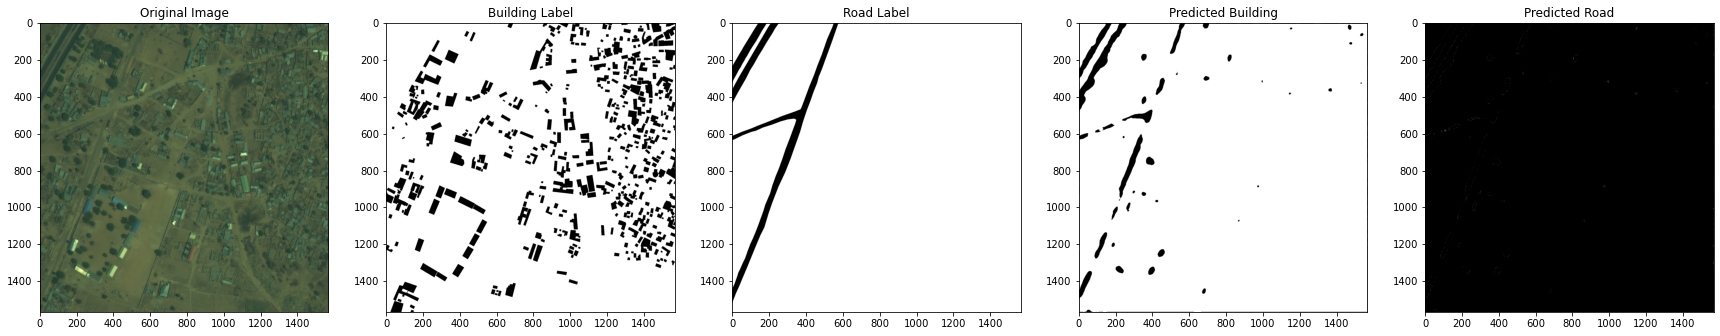

In [27]:
img = 6
startWidth = 150
endWidth = startWidth + 1600
startHeight = 1500
endHeight = startHeight + 1600

X_train_img = X_train[img]
y_train_img = y_train[img]

print(X_train_img.shape)
print(type(X_train_img[1,1,1]))


#a = X_train.swapaxes(0,2)[1600:1696,100:196,:]
print(datetime.datetime.now())
moi = X_train_img[:,startHeight:endHeight, startWidth:endWidth]
print(moi.shape)

finalPred = one_hot(argmax(np.squeeze(model.predict(np.expand_dims(moi.swapaxes(0,2), axis=0))),axis=-1),depth=3)
print(datetime.datetime.now())
show_images([X_train_img[13:,:,:].swapaxes(0,2).astype(np.float64)[startWidth+16:endWidth-16,startHeight+16:endHeight-16,:],
             1-y_train_img.swapaxes(0,2).astype(np.float64)[:,:,1][startWidth+16:endWidth-16,startHeight+16:endHeight-16],
             1-y_train_img.swapaxes(0,2).astype(np.float64)[:,:,2][startWidth+16:endWidth-16,startHeight+16:endHeight-16],
             finalPred[:,:,1], finalPred[:,:,2]],
            titles=["Original Image", "Building Label", "Road Label", "Predicted Building", "Predicted Road"])

##### Due to the model's unreasonable performance, post processing was not attempted